In [1]:
import time      # for testing use only
import os         # for testing use only

from bs4 import BeautifulSoup as bs
import pandas as pd
import scipy as sc
import numpy as np
import requests
from lxml import html
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import gmplot
import matplotlib.image as mpimg
from IPython.display import IFrame

%matplotlib inline

In [2]:
def load_csv(file_name):
    df = pd.read_csv(file_name)
    return df

In [3]:
df = load_csv('FixData.csv')
df

,Name,Location,Vegetarian,Gluten,FoodRating,ServiceFood,ValueFood,RankingInArea,Ratings,CuisineCount,NumOfReviews,price,Origin,Type
0,Burger & Lobster,Midtown West,0,0,4.5,4.5,4.5,129,4.5,2,"1,078",2.5,American,Seafood
1,Club A Steakhouse,Flatiron District,0,1,4.5,4.5,4.5,1,4.5,2,"4,158",4.0,American,Steakhouse
2,Au Za'atar,Midtown East,0,0,4.5,4.0,4.0,2,4.5,2,247,2.5,Lebanese,Mediterranean
3,Boucherie Union Square,Downtown Manhattan,0,1,4.5,4.5,4.0,3,4.5,2,"1,065",4.0,French,Steakhouse
4,Mei Jin Ramen,Flatiron District,0,0,4.5,4.5,4.5,4,4.5,2,173,2.5,Japanese,Asian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5909,Quality Meats,Greenwich Village,0,1,4.5,4.5,4.0,471,4.5,2,"2,377",4.0,American,Steakhouse
5910,Il Punto,East Harlem,0,0,4.5,4.5,4.0,45,4.5,2,"1,517",2.5,Italian,Mediterranean
5911,Smith & Wollensky,Morningside Heights,0,1,4.0,4.0,3.5,838,4.0,2,"3,285",4.0,American,Steakhouse
5912,Chocolat Restaurant & Bar,Upper West Side,0,0,4.0,3.5,3.5,"4,053",3.5,2,123,2.5,American,Barbecue


In [5]:
df['Location'].value_counts()

Downtown Manhattan    1116
Midtown                614
Midtown West           436
Midtown East           398
Upper East Side        363
                      ... 
Cobble Hill              1
Bronx Zoo                1
Flatbush                 1
Sheepshead Bay           1
Gravesend                1
Name: Location, Length: 76, dtype: int64

In [6]:
df.isnull().sum()

Name                1
Location           31
Vegetarian          0
Gluten              0
FoodRating          0
ServiceFood         0
ValueFood          31
RankingInArea       0
Ratings             0
CuisineCount        0
NumOfReviews        0
price              32
Origin              0
Type             1491
dtype: int64

In [7]:
df2= df.dropna()

In [8]:
df2['Ratings'].head(2000).value_counts()

4.5    1042
4.0     895
3.5      38
5.0      25
Name: Ratings, dtype: int64

<AxesSubplot:ylabel='Location'>

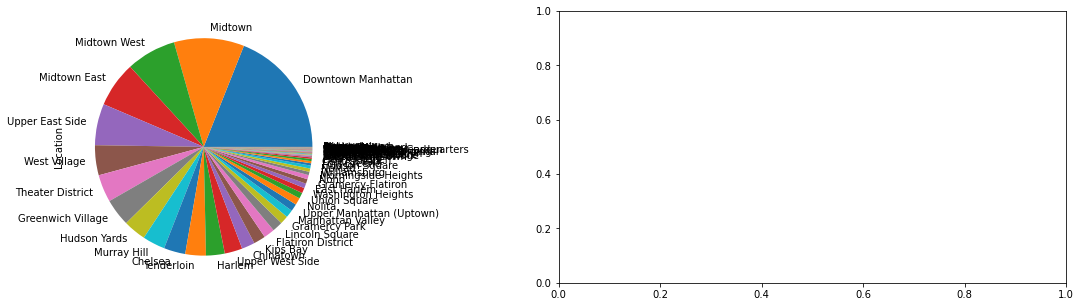

In [4]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
df['Location'].value_counts().plot(kind='pie',ax=axes[0])

In [5]:
df2.shape

NameError: name 'df2' is not defined

In [7]:
rest_data = df.copy()

In [8]:
rest_data

,Name,Location,Vegetarian,Gluten,FoodRating,ServiceFood,ValueFood,RankingInArea,Ratings,CuisineCount,NumOfReviews,price,Origin,Type
0,Burger & Lobster,Midtown West,0,0,4.5,4.5,4.5,129,4.5,2,"1,078",2.5,American,Seafood
1,Club A Steakhouse,Flatiron District,0,1,4.5,4.5,4.5,1,4.5,2,"4,158",4.0,American,Steakhouse
2,Au Za'atar,Midtown East,0,0,4.5,4.0,4.0,2,4.5,2,247,2.5,Lebanese,Mediterranean
3,Boucherie Union Square,Downtown Manhattan,0,1,4.5,4.5,4.0,3,4.5,2,"1,065",4.0,French,Steakhouse
4,Mei Jin Ramen,Flatiron District,0,0,4.5,4.5,4.5,4,4.5,2,173,2.5,Japanese,Asian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5909,Quality Meats,Greenwich Village,0,1,4.5,4.5,4.0,471,4.5,2,"2,377",4.0,American,Steakhouse
5910,Il Punto,East Harlem,0,0,4.5,4.5,4.0,45,4.5,2,"1,517",2.5,Italian,Mediterranean
5911,Smith & Wollensky,Morningside Heights,0,1,4.0,4.0,3.5,838,4.0,2,"3,285",4.0,American,Steakhouse
5912,Chocolat Restaurant & Bar,Upper West Side,0,0,4.0,3.5,3.5,"4,053",3.5,2,123,2.5,American,Barbecue


In [124]:
dfl = df["Location"].tolist()

for i,n in enumerate(dfl):
    try:
        dfl[i] = dfl[i].replace(" (Downtown)","").replace("miles from","")
        for j in dfl[i]:
            if j.isdigit():
                dfl[i] = dfl[i].replace('  ',"").replace(j,"").replace('.',"")
    except:
        dfl[i] = None
dfl

rest_data['Location'] = dfl

In [151]:
fileName='FixData.csv'
rest_data.to_csv(fileName, encoding='utf-8', index=False)

In [8]:
rest_data['Location'].unique()

array(['Midtown West', 'Flatiron District', 'Midtown East',
       'Downtown Manhattan', 'Upper East Side', 'Chelsea', 'West Village',
       'Midtown', 'Harlem', 'Hudson Yards', 'Murray Hill', 'Kips Bay',
       'Greenwich Village', 'Nolita', 'Theater District', 'Tenderloin',
       'Upper West Side', 'Fort Greene', 'NoMad', 'Noho', 'Gramercy Park',
       'Central Park', 'Williamsburg', 'Lincoln Square',
       'Manhattan Valley', 'Union Square', 'Gramercy-Flatiron',
       'Madison Square', 'Chinatown', 'Hudson Square', "Hell's Kitchen",
       nan, 'Morningside Heights', 'East Harlem', 'Stuyvesant Square',
       'Upper Manhattan (Uptown)', 'Washington Heights', 'Sheepshead Bay',
       'Fort George', 'South Slope', 'Liberty Island', 'Borough Park',
       'Bergen Beach', 'Astoria', 'Rose Hill', 'Stuyvesant Town',
       'Sunset Park', 'Carroll Gardens', 'Park Slope', 'Cobble Hill',
       'Greenpoint', 'Roosevelt Island', 'Prospect Heights',
       'Governors Island', 'Clinton Hil

<AxesSubplot:title={'center':'Total Restaurants in New York'}>

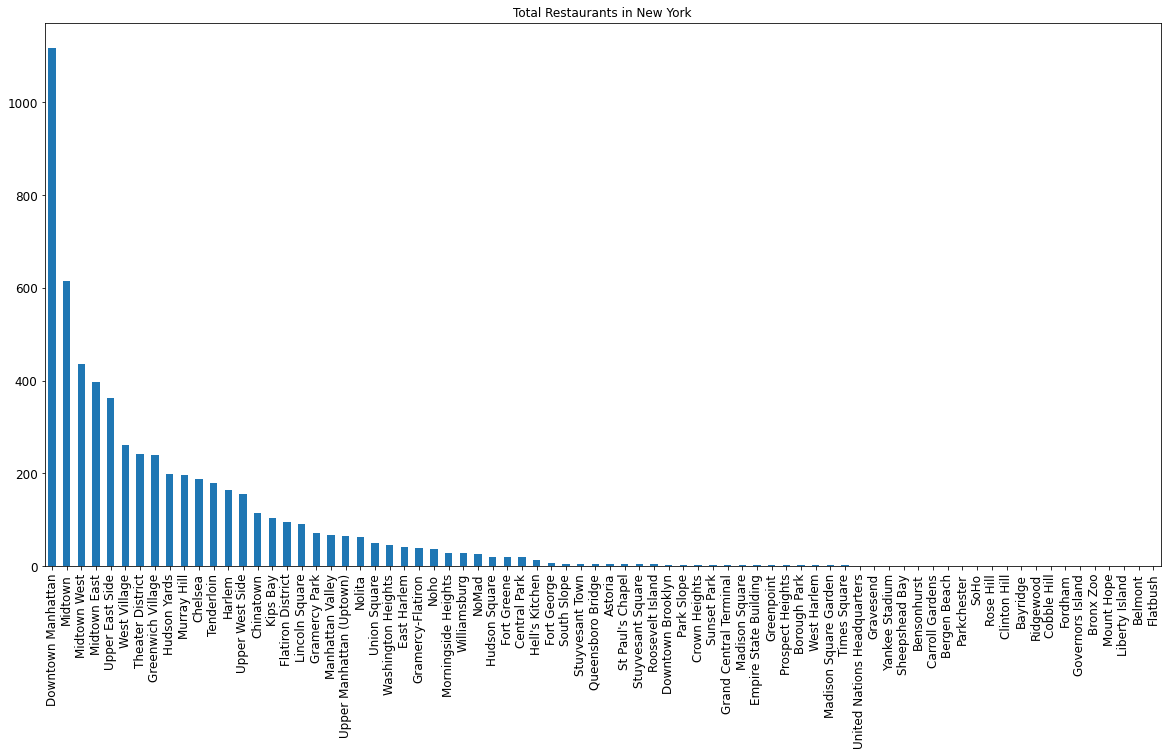

In [9]:
rest_data['Location'].value_counts().plot(kind='bar',title='Total Restaurants in New York'
                                             ,figsize=(20,10),fontsize=12)

<AxesSubplot:ylabel='Location'>

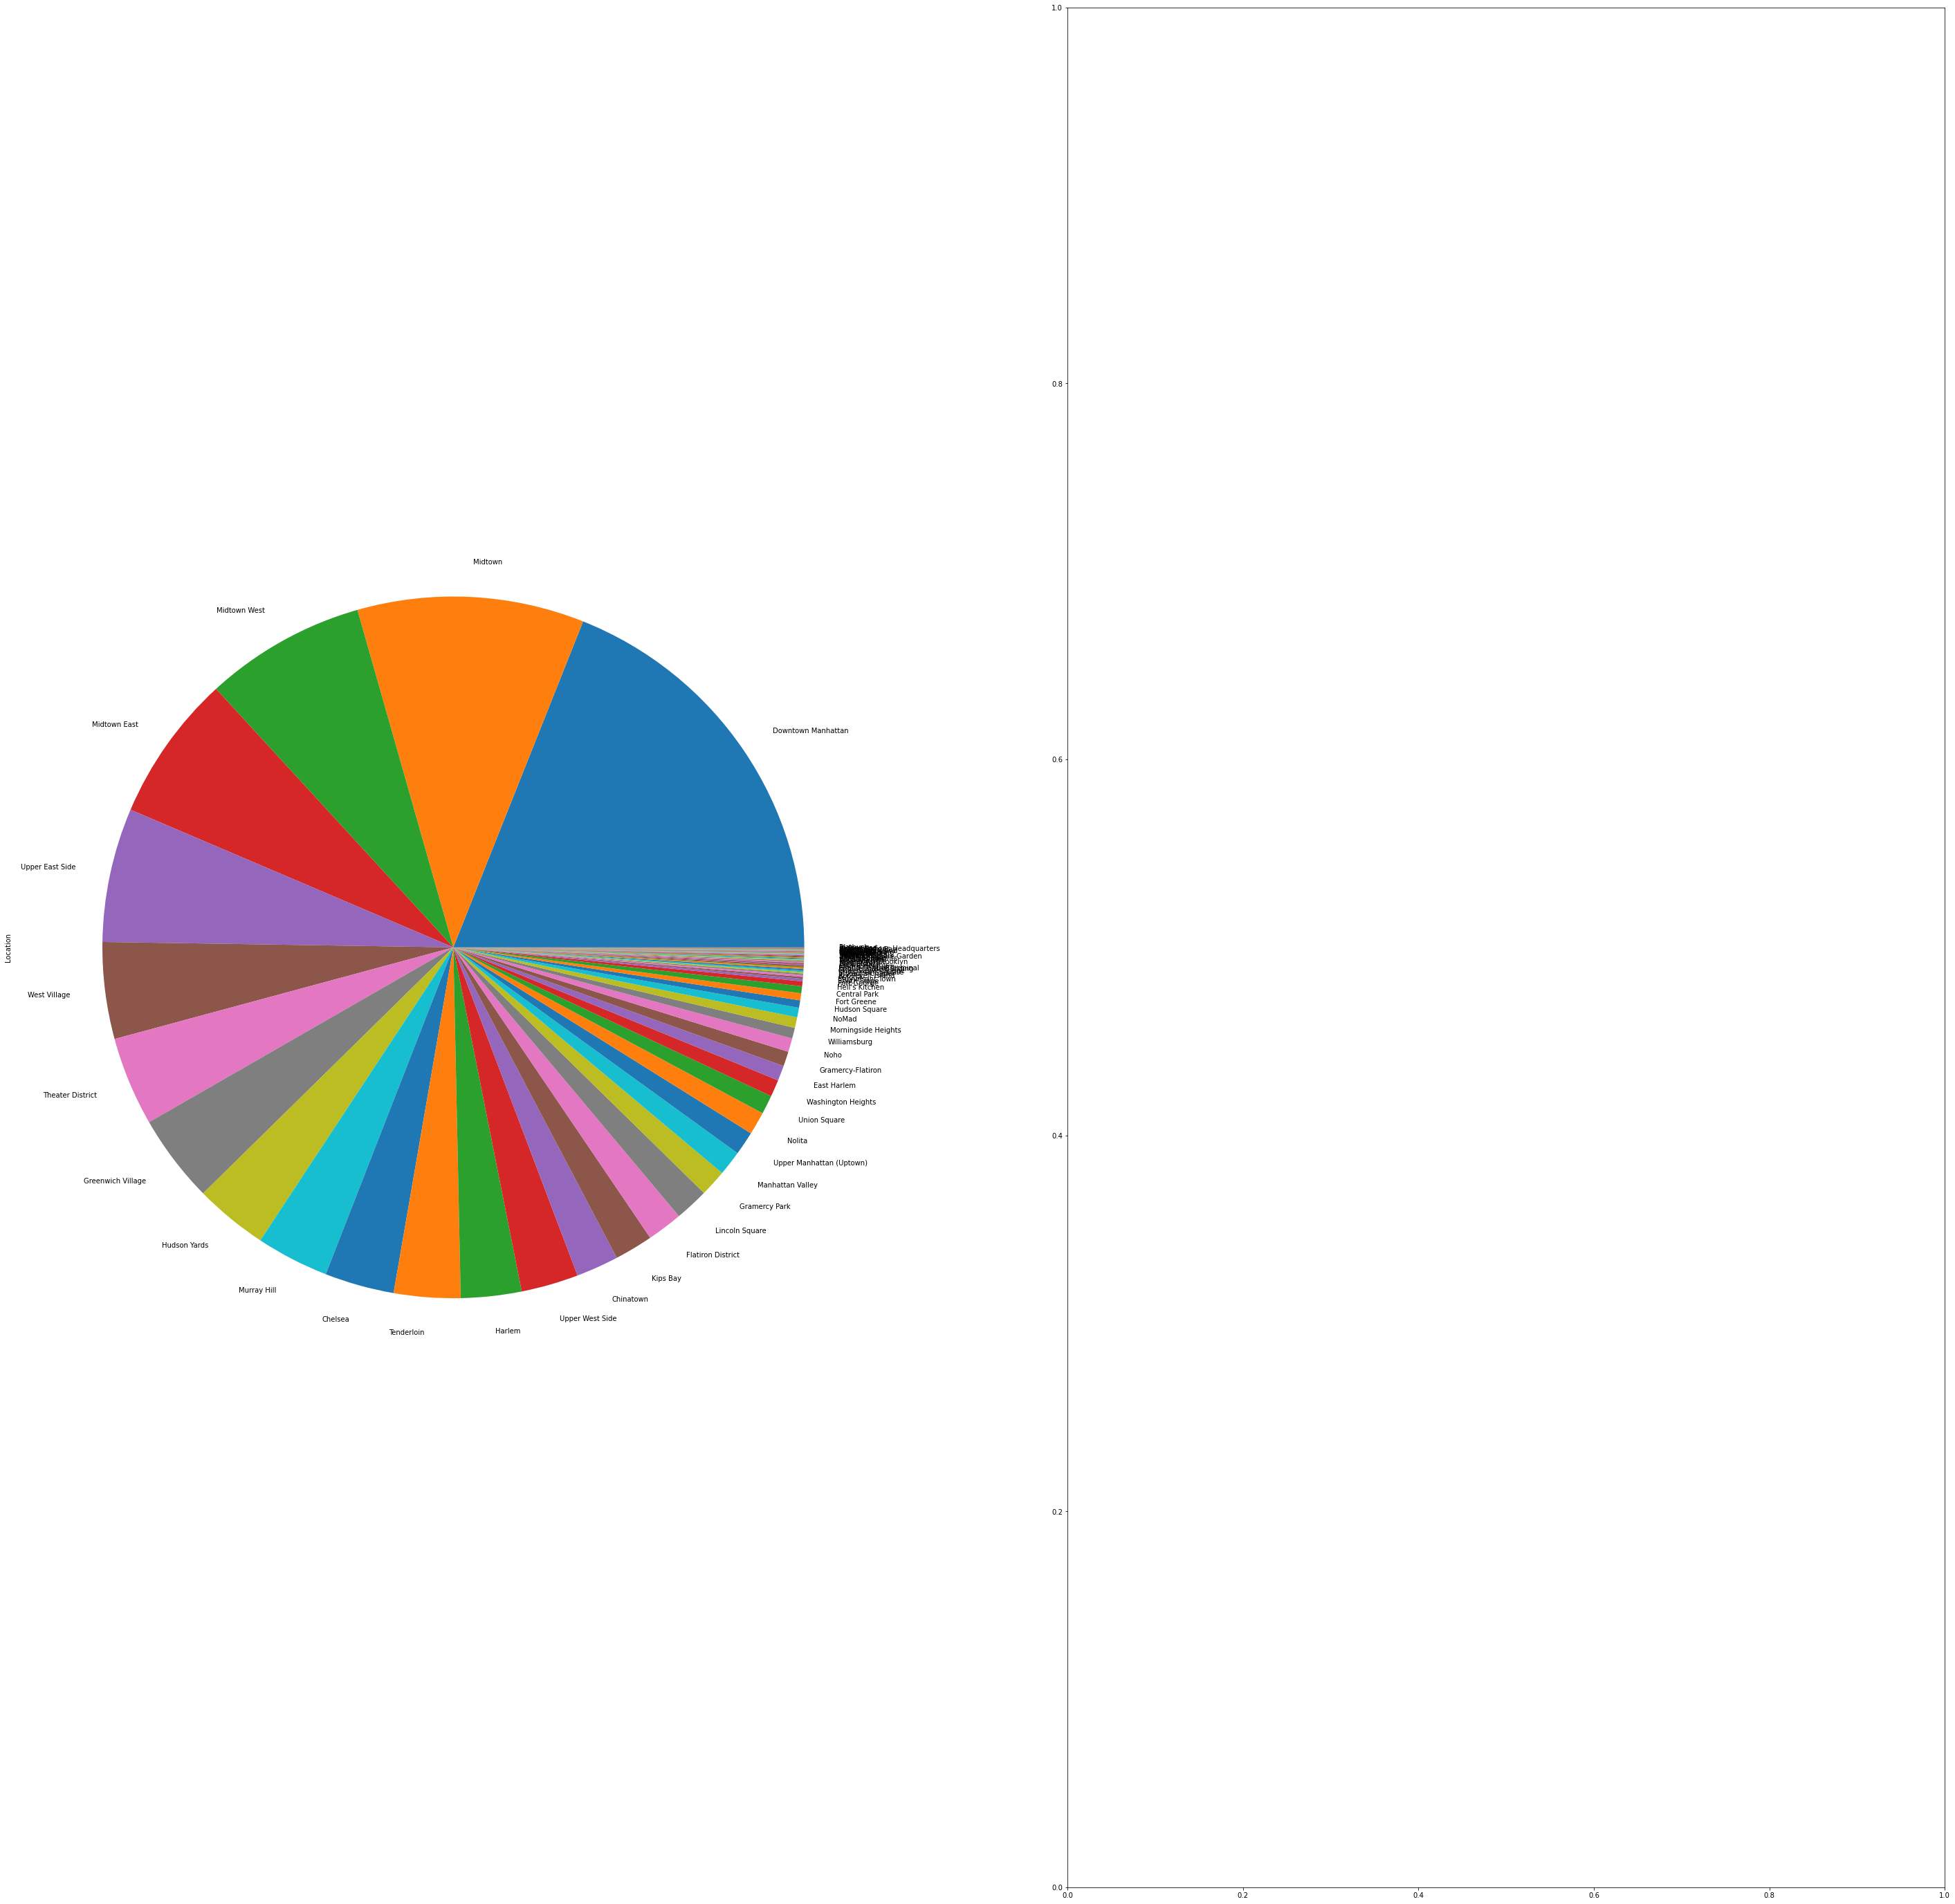

In [141]:
fig, axes = plt.subplots(1,2, figsize=(50,50))
rest_data['Location'].value_counts().plot(kind='pie',ax=axes[0])

In [167]:
grouped_cities=rest_data.groupby('Location',as_index=False)[['Name']].count().sort_values(ascending=False,by='Name')
grouped_cities['total'] = grouped_cities['Name'].sum()
grouped_cities['percent'] = (grouped_cities['Name']/grouped_cities['total'])*100
grouped_cities.head()

,Location,Name,total,percent
15,Downtown Manhattan,1116,5882,18.973138
40,Midtown,614,5882,10.438626
42,Midtown West,436,5882,7.412445
41,Midtown East,398,5882,6.766406
68,Upper East Side,363,5882,6.171370


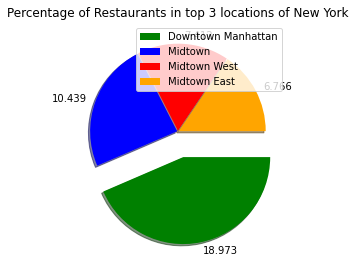

In [233]:
colors = ['g', 'b', 'r','orange']
explode = (0.3, 0.01, 0.01, 0.01)
label = grouped_cities['Location'].head(4)
values = grouped_cities['percent'].head(4).round(3)
plt.pie(values, colors=colors, labels= values ,explode=explode,counterclock=False, shadow=True)
plt.title('Percentage of Restaurants in top 3 locations of New York')
plt.legend(label,loc=1,fontsize=10)
plt.show()

In [234]:
rest_new_ny = rest_data[rest_data['Location'] == 'Downtown Manhattan']
rest_new_ny.head()

,Name,Location,Vegetarian,Gluten,FoodRating,ServiceFood,ValueFood,RankingInArea,Ratings,CuisineCount,NumOfReviews,price,Origin,Type
3,Boucherie Union Square,Downtown Manhattan,0,1,4.5,4.5,4.0,3,4.5,2,"1,065",4.0,French,Steakhouse
6,Creamline,Downtown Manhattan,0,0,4.5,4.0,4.0,92,4.5,2,208,1.0,Quick Bites,American
9,Bleecker Street Pizza,Downtown Manhattan,0,0,4.5,4.5,4.5,8,4.5,2,"1,535",1.0,Italian,Pizza
13,Olio e Piu,Downtown Manhattan,0,0,4.5,4.0,4.0,11,4.5,2,"2,513",2.5,Italian,Pizza
20,San Carlo Osteria Piemonte,Downtown Manhattan,1,0,4.5,4.5,4.5,17,4.5,2,710,2.5,Italian,Mediterranean


In [249]:
rest_new_ny['Type'].unique().tolist()

[' Steakhouse',
 ' American',
 ' Pizza',
 ' Mediterranean',
 ' Asian',
 ' Bar',
 ' Seafood',
 nan,
 ' Cajun & Creole',
 ' Latin',
 ' Contemporary',
 ' Sicilian',
 ' Italian',
 ' Korean',
 ' Thai',
 ' Irish',
 ' Grill',
 ' Spanish',
 ' Russian',
 ' European',
 ' Barbecue',
 ' French',
 ' Cafe',
 ' South American',
 ' Diner',
 ' Deli',
 ' Healthy',
 ' Fast Food',
 ' Tuscan',
 ' Southwestern',
 ' Middle Eastern',
 ' International',
 ' Chinese',
 ' Soups',
 ' Brew Pub',
 ' Gastropub',
 ' Catalan',
 ' British',
 ' Vietnamese',
 ' Australian',
 ' Japanese',
 ' Sushi',
 ' Indonesian',
 ' Street Food',
 ' Ethiopian',
 ' Central American',
 ' Greek',
 ' Malaysian',
 ' Pub',
 ' Fusion',
 ' Turkish',
 ' Dining bars',
 ' Indian',
 ' Wine Bar',
 ' Afghani',
 ' Moroccan',
 ' Caribbean',
 ' Central Asian',
 ' Swedish',
 ' Brazilian',
 ' Taiwanese',
 ' Colombian',
 ' Persian']

In [277]:
types = rest_new_ny['Type'].unique().tolist()

ny_types = rest_new_ny[rest_new_ny['Type'].isin(types)]
ny_types = ny_types.groupby('Type',as_index=False)[['Ratings','NumOfReviews']].mean().round(2).sort_values(ascending=False,by='Ratings')

In [278]:
ny_types

,Type,Ratings
55,Swedish,5.00
31,Indonesian,4.50
38,Malaysian,4.50
10,Cajun & Creole,4.50
56,Taiwanese,4.50
...,...,...
15,Chinese,3.93
5,Barbecue,3.86
61,Wine Bar,3.83
11,Caribbean,3.75


In [289]:
ny_types.sort_values(ascending=False,by='Ratings')


,Type,Ratings
55,Swedish,5.00
31,Indonesian,4.50
38,Malaysian,4.50
10,Cajun & Creole,4.50
56,Taiwanese,4.50
...,...,...
15,Chinese,3.93
5,Barbecue,3.86
61,Wine Bar,3.83
11,Caribbean,3.75


In [291]:
grouped_types=rest_new_ny.groupby('Type',as_index=False)[['Location']].count().sort_values(ascending=False,by='Location')


In [292]:
grouped_types

,Type,Location
4,Bar,122
2,Asian,84
43,Pizza,53
1,American,44
37,Latin,43
...,...,...
25,Fusion,1
26,Gastropub,1
30,Indian,1
45,Russian,1


In [16]:
array_loc = rest_data['Location'].unique()
array_loc

array(['Midtown West', 'Flatiron District', 'Midtown East',
       'Downtown Manhattan', 'Upper East Side', 'Chelsea', 'West Village',
       'Midtown', 'Harlem', 'Hudson Yards', 'Murray Hill', 'Kips Bay',
       'Greenwich Village', 'Nolita', 'Theater District', 'Tenderloin',
       'Upper West Side', 'Fort Greene', 'NoMad', 'Noho', 'Gramercy Park',
       'Central Park', 'Williamsburg', 'Lincoln Square',
       'Manhattan Valley', 'Union Square', 'Gramercy-Flatiron',
       'Madison Square', 'Chinatown', 'Hudson Square', "Hell's Kitchen",
       nan, 'Morningside Heights', 'East Harlem', 'Stuyvesant Square',
       'Upper Manhattan (Uptown)', 'Washington Heights', 'Sheepshead Bay',
       'Fort George', 'South Slope', 'Liberty Island', 'Borough Park',
       'Bergen Beach', 'Astoria', 'Rose Hill', 'Stuyvesant Town',
       'Sunset Park', 'Carroll Gardens', 'Park Slope', 'Cobble Hill',
       'Greenpoint', 'Roosevelt Island', 'Prospect Heights',
       'Governors Island', 'Clinton Hil

In [ ]:
def Convert(a):
    it = iter(a)
    res_dct = dict(zip(it, it))
    return res_dct
         
# Driver code
lst = ['a', 1, 'b', 2, 'c', 3]
print(Convert(lst))

In [12]:
from geopy.geocoders import Nominatim
latitude=[]
longitude=[]
for loc in array_loc:
    if type(loc) == str:
        address = loc + ', New York'
        geolocator = Nominatim(user_agent="tor_explorer")
        location = geolocator.geocode(address)
        if location:
            latitude.append(location.latitude)
            longitude.append(location.longitude)

In [52]:
longAndlat=[]
for loc in df['Location']:
    if type(loc) == str:
        address = loc + ', New York'
        geolocator = Nominatim(user_agent="tor_explorer")
        location = geolocator.geocode(address)
        if location:
            listo = [location.latitude, location.longitude]
            longAndlat.append(listo)
    else:
        longAndlat.append(np.nan)
    time.sleep(10)

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Kips+Bay%2C+New+York&format=json&limit=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001EF4D85FAF0>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)'))

In [49]:
aalongAndlat=[]
for loc in array_loc:
    if type(loc) == str:
        address = loc + ', New York'
        geolocator = Nominatim(user_agent="tor_explorer")
        location = geolocator.geocode(address)
        if location:
            longandlat = [location.latitude, location.longitude]
            aalongAndlat(longandlat)

[40.7644228, -73.9923918]
[40.7410722, -73.9896534]
[40.7598219, -73.9724708]
[40.7130418, -74.0139589]
[40.7737016, -73.9641196]
[40.7464906, -74.0015283]


KeyboardInterrupt: 

In [41]:
aalongAndlat[0].latitude

40.7644228

In [12]:
df_longAndlat = pd.DataFrame(longAndlat)
df_longAndlat

NameError: name 'longAndlat' is not defined

In [28]:
fileName='longAndlat.csv'
df_longAndlat.to_csv(fileName, encoding='utf-8', index=False)

In [11]:

loc_dic = dict(zip(latitude, longitude))
loc_dic

NameError: name 'latitude' is not defined

In [29]:
pip install gmplot

Note: you may need to restart the kernel to use updated packages.


In [10]:

gmap = gmplot.GoogleMapPlotter(0, 0, 2)
gmap.heatmap(latitude, longitude)
gmap.scatter(latitude, longitude, c='r', marker=True)

gmap.draw('map.html')

NameError: name 'latitude' is not defined

In [13]:
gmap.draw('map.html')

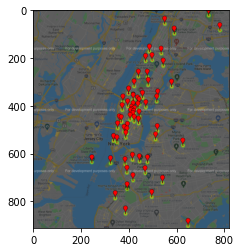

In [51]:
img = mpimg.imread('map.png')
imgplot = plt.imshow(img)
plt.show()

In [84]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

ModuleNotFoundError: No module named 'geopandas'

In [87]:
conda install -c conda-forge geopandas

^C

Note: you may need to restart the kernel to use updated packages.


In [90]:
pip install plotly==5.5.0

Note: you may need to restart the kernel to use updated packages.


In [14]:
dfloc= pd.DataFrame()
dfloc['Latitude'] = latitude
dfloc['Longitude'] = longitude
dfloc

,Latitude,Longitude
0,40.764423,-73.992392
1,40.741072,-73.989653
2,40.759822,-73.972471
3,40.713042,-74.013959
4,40.773702,-73.964120
...,...,...
70,40.652048,-73.959027
71,40.861475,-73.890544
72,40.722880,-73.998750
73,40.708056,-73.914167


In [15]:
fileName='dfLocation.csv'
dfloc.to_csv(fileName, encoding='utf-8', index=False)

In [99]:
import plotly.express as px
import pandas as pd

fig = px.scatter_geo(dfloc,lat='Latitude',lon='Longitude')
fig.update_layout(title = 'World map', title_x=0.9)
fig.show()

In [97]:

fig = px.scatter_mapbox(dfloc, lat='Latitude',lon='Longitude')
fig.show()

In [76]:
geometry = [Point(xy) for xy in zip(dfloc['Longitude'], dfloc['Latitude'])]
gdf = GeoDataFrame(dfloc, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

NameError: name 'Point' is not defined

In [14]:
IFrame(src='map.html', width=600, height=500)

In [ ]:
correlation = delhi_local_coffee_shops.groupby('restaurant name',as_index=False)[['average cost for two','aggregate rating']].mean().round(2).sort_values(ascending=False,by='aggregate rating')

#plot scatter graph to analyse correlation
weight = correlation['aggregate rating']
height = correlation['average cost for two']
plt.figure(figsize=(10,8))
plt.scatter(weight,height,c='g',marker='o')
plt.xlabel('Average Rating')
plt.ylabel('Average Cost')
plt.title('Average Rating Vs Average Cost for Local Coffee Shops')
plt.show()